In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Data/raw_data.csv')
df.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
df_test=df.drop('Good/Bad',axis=1)
df_test.to_csv('Data/test1.csv',index=False,header=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 592 entries, Unnamed: 0 to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 462.6+ KB


In [5]:
df.isna().sum().sum()


2306

There is huge number of missing data which needs to be handeled 3.8% data is missing

In [6]:
df.shape
m=230600/59200
m

3.89527027027027

KeyboardInterrupt: 

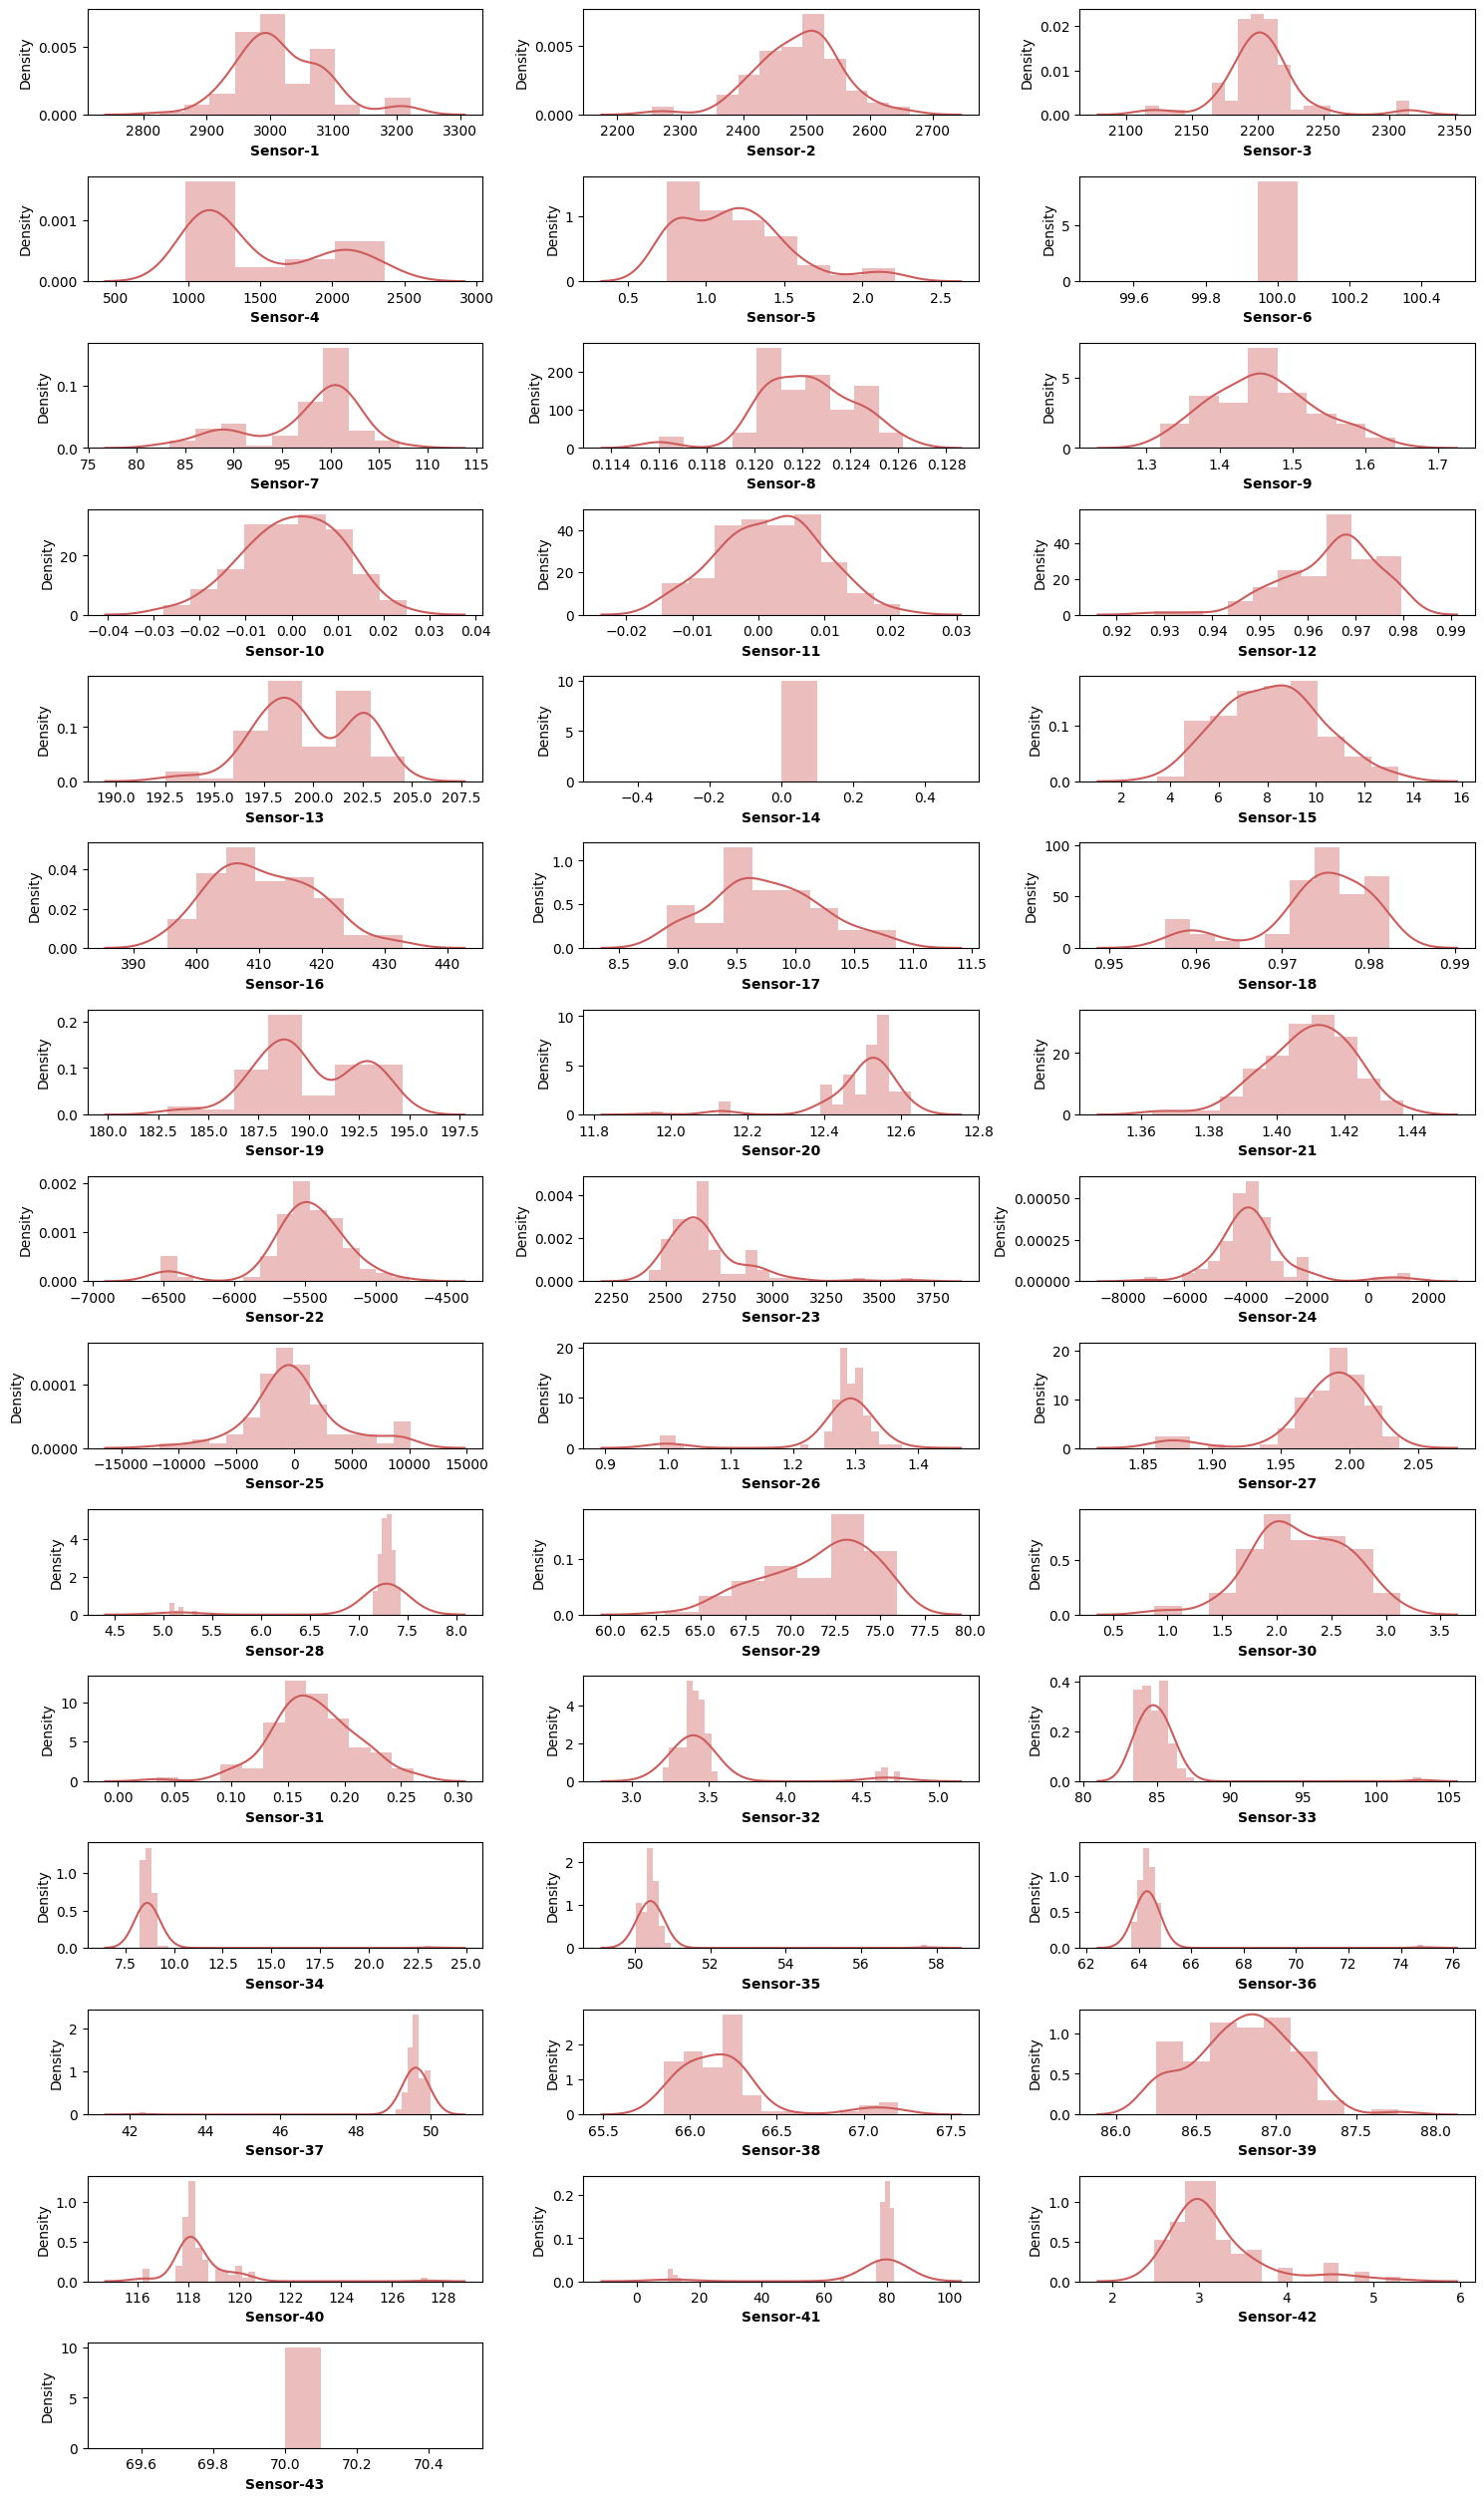

In [7]:
plt.figure(figsize=(15, 100))

for i, col in enumerate(df.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

There are a lot of columns which have 0 std so there is no need of such data points we can straight away drop them
As well as columns that has too much missing values.

In [ ]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop   

In [ ]:
cols_to_drop_2 = get_cols_with_zero_std_dev(df)
#cols_to_drop_2.append("Wafer")
len(cols_to_drop_2)

122

In [ ]:
cols_to_drop_1 = get_redundant_cols(df,missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

We are having 126 useless columns we will drop them

In [ ]:
drop_cols=cols_to_drop_1+cols_to_drop_2

df=df.drop(drop_cols,axis=1)


In [ ]:
drop_cols

['Sensor-158',
 'Sensor-159',
 'Sensor-293',
 'Sensor-294',
 'Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Se

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
X.shape

(100, 465)

In [ ]:
y.shape

(100,)

In [ ]:
X.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,97.5822,0.1242,1.5300,-0.0279,...,NaN,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,96.7700,0.1230,1.3953,0.0084,...,NaN,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.3896,0.0138,...,NaN,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,101.8644,0.1220,1.4108,-0.0046,...,NaN,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,104.8856,0.1234,1.5094,-0.0046,...,NaN,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876


In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=30)

Too many Outliers are present. We shouldnot use standard scaler as standard scaler isnot robust to outliers

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler

imputer = KNNImputer(n_neighbors=3)
preprocessing_pipeline = Pipeline(
    steps=[('Imputer', imputer), ('Scaler', RobustScaler())])
preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [ ]:
X.head()
X=X.drop('Unnamed: 0',axis=1)

In [ ]:

X_trans = preprocessing_pipeline.fit_transform(X)
print("Shape of transformed features set: ", X_trans.shape)
X_trans

Shape of transformed features set:  (100, 464)


array([[-0.37110152, -0.21388855,  0.67805794, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [-0.44644841,  0.15494872, -1.32959552, ...,  0.46272494,
         0.515625  , -0.40093   ],
       [ 0.70070541,  0.08389967,  0.20530751, ...,  0.46272494,
         0.515625  , -0.40093   ],
       ...,
       [ 0.83289837, -1.31558137, -1.26792905, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.49988372,  0.59310515, -0.16308229, ..., -0.93573265,
        -0.671875  , -0.44021198],
       [-0.92374874, -0.35561596,  0.40033513, ..., -0.93573265,
        -0.671875  , -0.44021198]])

In [ ]:
y.value_counts()


Good/Bad
-1    94
 1     6
Name: count, dtype: int64

It's a highly imbalanced dataset.... We need to resample it

In [ ]:

from imblearn.combine import SMOTETomek

X, y = X_trans, y
resampler = SMOTETomek(sampling_strategy="minority")
X_res, y_res = resampler.fit_resample(X, y)



In [ ]:
y_res.value_counts()

Good/Bad
-1    94
 1    94
Name: count, dtype: int64

In [ ]:
X_res.shape

(188, 464)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=1/3, random_state=42)


In [ ]:
print("Before resampling, Shape of training instances: ", np.c_[X, y].shape)
print("After resampling, Shape of training instances: ", np.c_[X_res, y_res].shape)

Before resampling, Shape of training instances:  (100, 465)
After resampling, Shape of training instances:  (188, 465)


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score,accuracy_score

# Shortlisted base Models
svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(objective='binary:logistic')
gb_clf=GradientBoostingClassifier()

ModuleNotFoundError: No module named 'xgboost'

In [ ]:

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [ ]:
svc_scores = cross_val_score(svc_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)
display_scores(svc_scores)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [ ]:
svc_preds = cross_val_predict(svc_clf, X_test, y_test, cv=5)

# AUC score
svc_auc = roc_auc_score(y_test, svc_preds)
svc_auc

0.9558823529411764

In [ ]:

svc_rbf_scores = cross_val_score(svc_rbf_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)
display_scores(svc_rbf_scores)
svc_rbf_preds = cross_val_predict(svc_rbf_clf, X_test, y_test, cv=5)

# AUC score
svc_rbf_auc = roc_auc_score(y_test, svc_rbf_preds)
svc_rbf_auc


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
Scores:  [1.         0.92857143 1.         1.         1.         1.
 1.         1.         1.         1.        ]
Mean:  0.9928571428571429
Standard Deviation:  0.02142857142857142


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.9680527383367141

In [ ]:

random_forest_scores = cross_val_score(random_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)
display_scores(random_forest_scores)
random_forest_preds = cross_val_predict(random_clf, X_test, y_test, cv=5)

# AUC score
random_forest_auc = roc_auc_score(y_test, random_forest_preds)
random_forest_auc


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished


1.0

In [ ]:

xgb_scores = cross_val_score(xgb_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)
display_scores(xgb_scores)
xgb_preds = cross_val_predict(xgb_clf, X_test, y_test, cv=5)

# AUC score
xgb_auc = roc_auc_score(y_test, xgb_preds)
xgb_auc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.3s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.5s
[CV] END .................................................... total time=   0.4s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.3s
[CV] END .................................................... total time=   0.3s
Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.2s finished


0.9827586206896552

In [ ]:
gb_scores = cross_val_score(gb_clf, X_train, y_train, scoring='roc_auc', cv=10, verbose=2)
display_scores(gb_scores)
gb_preds = cross_val_predict(gb_clf, X_test, y_test, cv=5)

# AUC score
gb_auc = roc_auc_score(y_test, gb_preds)
gb_auc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s


[CV] END .................................................... total time=   2.0s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   2.1s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   1.9s
[CV] END .................................................... total time=   1.8s
[CV] END .................................................... total time=   1.5s
[CV] END .................................................... total time=   2.4s
[CV] END .................................................... total time=   2.0s
Scores:  [1.         1.         1.         1.         1.         1.
 1.         0.91666667 1.         1.        ]
Mean:  0.9916666666666668
Standard Deviation:  0.02499999999999998


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   21.5s finished


0.8280933062880326